# Importing Dependencies

In [1]:
import time
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.exceptions import DataConversionWarning
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Importing Dataset

In [2]:
df = pd.read_csv('wines.csv')

# Information About Dataset

In [3]:
# Concise Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
# Overview of Dataset
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Preliminary Statistical Summary
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Exploratory Data Analysis (EDA)

In [6]:
print(df['Hue'])

0      1.04
1      1.05
2      1.03
3      0.86
4      1.04
       ... 
173    0.64
174    0.70
175    0.59
176    0.60
177    0.61
Name: Hue, Length: 178, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

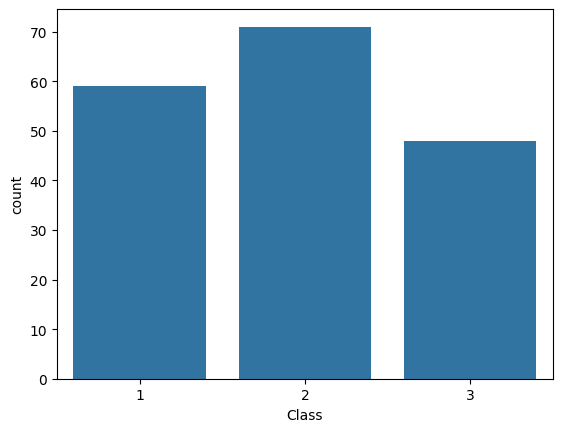

In [7]:
# Count of Different Classes
sns.countplot(x = df['Class'])

<Axes: xlabel='Class', ylabel='Alcohol'>

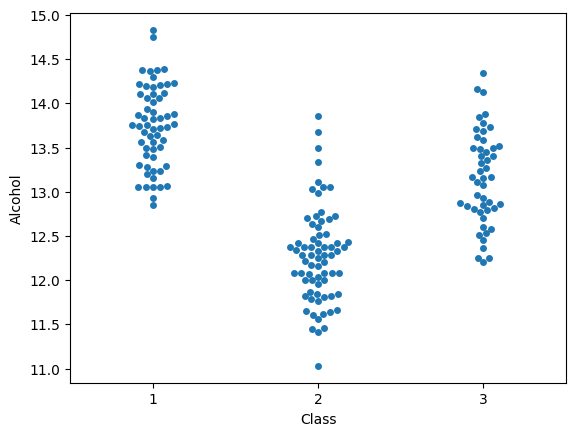

In [8]:
# Swarm Plot
sns.swarmplot(x = df['Class'], y = df['Alcohol'])

<Axes: xlabel='Class', ylabel='Color_intensity'>

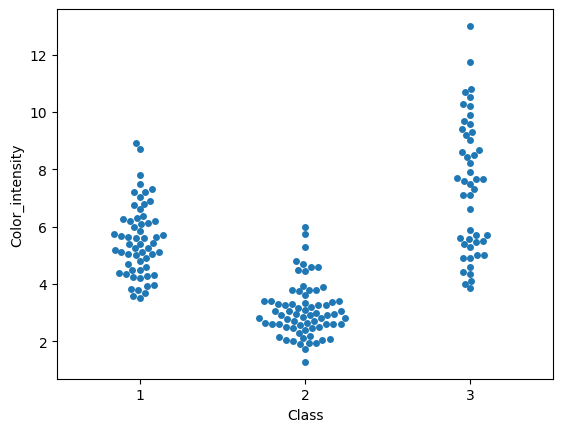

In [9]:
# Swarm Plot
sns.swarmplot(x = df['Class'], y = df['Color_intensity'])

<Axes: xlabel='Class', ylabel='Color_intensity'>

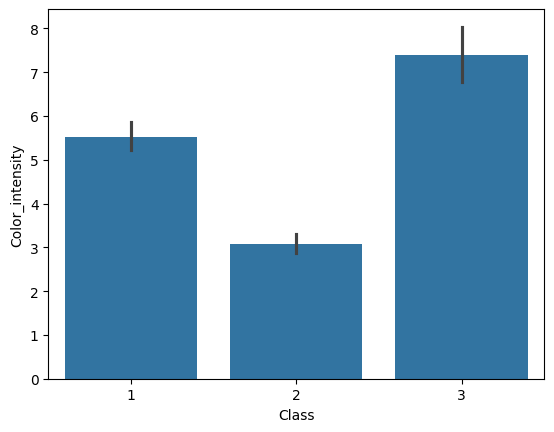

In [10]:
# Bar Plot
sns.barplot(x = df['Class'], y = df['Color_intensity'])

<Axes: xlabel='Class', ylabel='Flavanoids'>

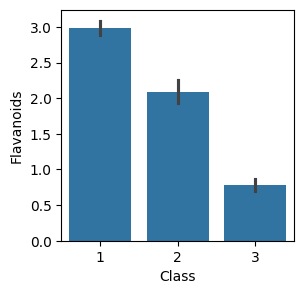

In [11]:
# Bar Plot
plt.figure(figsize = (3, 3))
sns.barplot(x = df['Class'], y = df['Flavanoids'])

<Axes: xlabel='Alcohol', ylabel='Hue'>

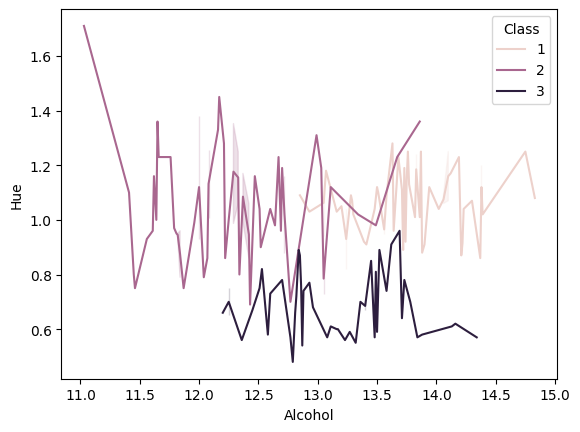

In [12]:
# Line Plot
sns.lineplot(x = df['Alcohol'], y = df['Hue'], hue = df['Class'])

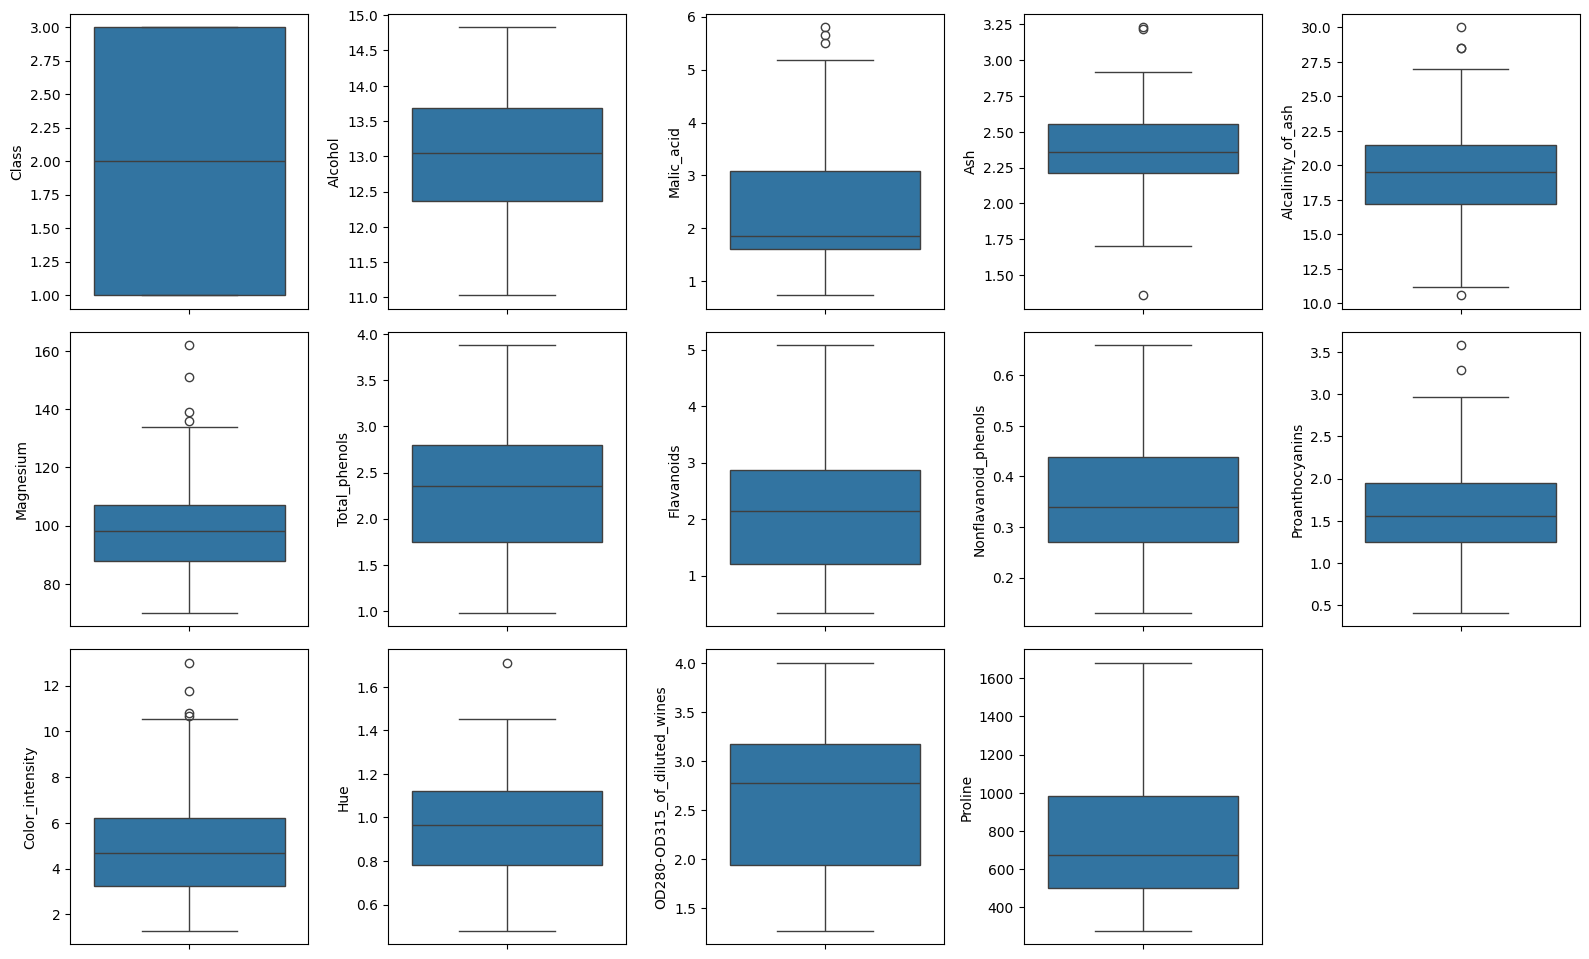

In [13]:
# Boxplot for Every Column
plt.figure(figsize = (16, 16))
for j, attr in enumerate(list(df.columns.values)):
  plt.subplot(5, 5, j+1)
  sns.boxplot(y = df[attr])
  plt.tight_layout()

In [14]:
correlationmatrix = df[df.columns].corr()
correlationmatrix

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


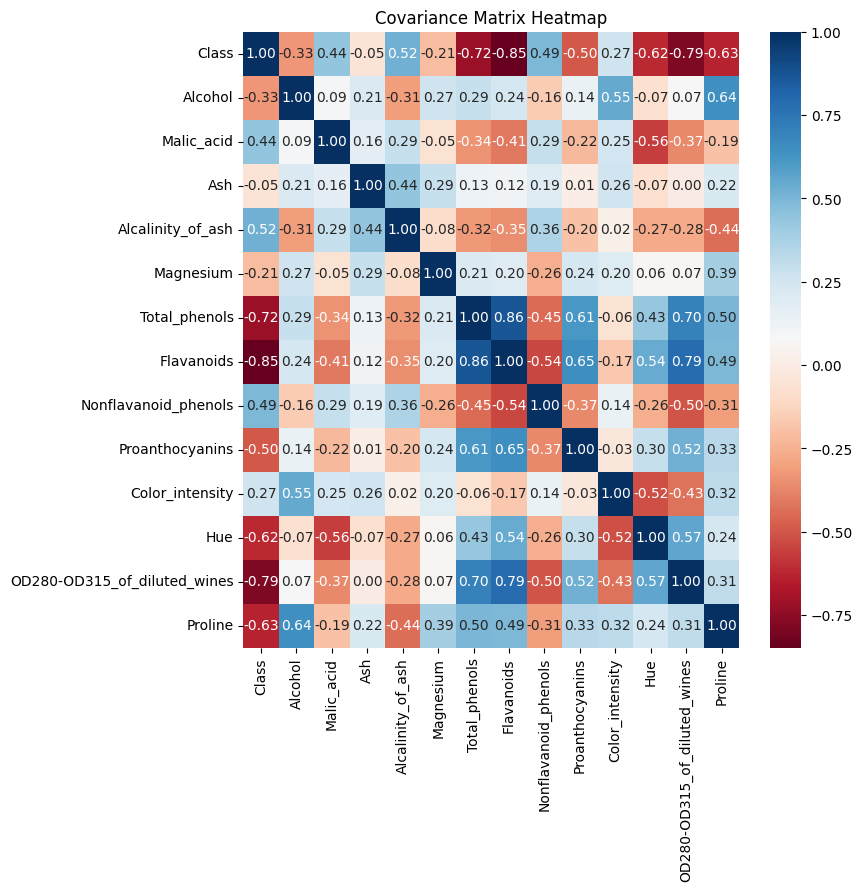

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlationmatrix, annot = True, cmap = 'RdBu', fmt = '.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [16]:
# Very Low Correlation
df = df.drop('Ash', axis = 1)
df = df.drop('Magnesium', axis = 1)

# Splitting the Dataset for ML Models

In [17]:
# Feature Vector (Independent Variable) Containing All Columns Except Class Label 
X = df
X = X.drop(['Class'],axis=1)

In [18]:
# Response Variable
Y = df['Class']

In [19]:
# Overview of X
X.head(10)

,Alcohol,Malic_acid,Alcalinity_of_ash,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,15.2,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,14.6,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,17.6,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,14.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,16.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [20]:
# Overview of Y
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.60, random_state = 42)

# Model - 1]
# Applying KNN [K- nearest neighbor algorithm] to Train Our Dataset

In [22]:
model1 = KNeighborsClassifier(n_neighbors = 3)

In [23]:
model1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Ignore Warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [25]:
Y_pred = model1.predict(X_test)

In [26]:
print("Accuracy is", accuracy_score(Y_test, Y_pred)*100)

Accuracy is 65.42056074766354


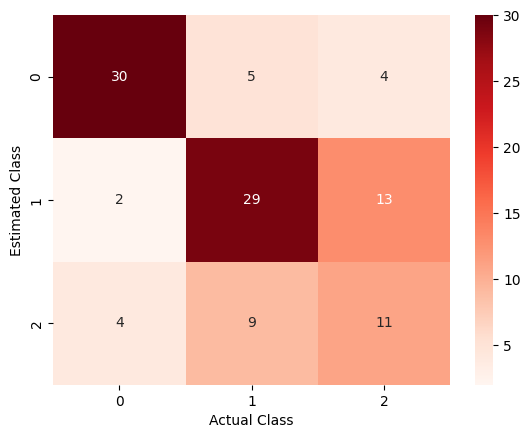

In [27]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix.T, annot = True, cmap = "Reds")
plt.xlabel('Actual Class')
plt.ylabel('Estimated Class')
plt.show()

# Model - 2]
# Naive Bayes to Train Our Dataset

In [28]:
model2 = GaussianNB()

In [29]:
model2.fit(X_train, Y_train)

GaussianNB()

In [30]:
Y_pred = model2.predict(X_test)

In [31]:
print("Accuracy is", accuracy_score(Y_test, Y_pred)*100)

Accuracy is 94.39252336448598


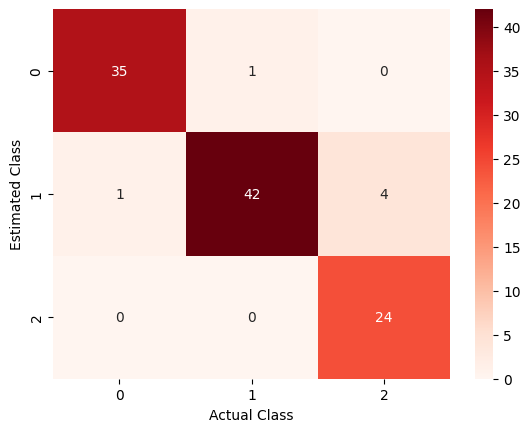

In [32]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix.T, annot = True, cmap = "Reds")
plt.xlabel('Actual Class')
plt.ylabel('Estimated Class')
plt.show()

# Model - 3]
# Random Forest to Train Our Dataset

In [33]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [34]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [35]:
Y_pred = random_forest.predict(X_test)

In [36]:
print("Accuracy is", accuracy_score(Y_test, Y_pred)*100)

Accuracy is 93.45794392523365


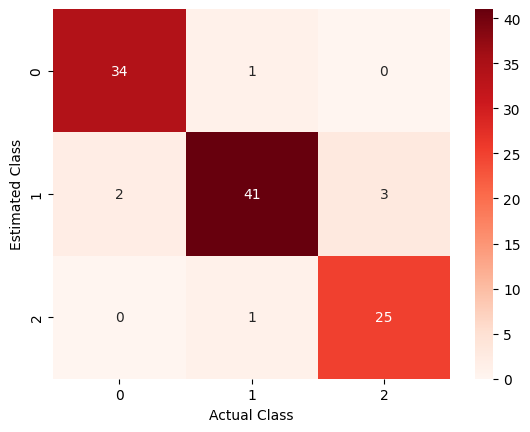

In [37]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix.T, annot = True, cmap = "Reds")
plt.xlabel('Actual Class')
plt.ylabel('Estimated Class')
plt.show()

# Model - 4]
# Feedforward Aritificial Neural Network

In [38]:
Y = Y - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.60, random_state = 42)

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(11,)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")




Epoch 1/50


3/3 [==============================] - 2s 173ms/step - loss: 63.3397 - accuracy: 0.2958 - val_loss: 19.7663 - val_accuracy: 0.1121
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 55.6482 - accuracy: 0.3239 - val_loss: 36.0393 - val_accuracy: 0.2617
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 46.4468 - accuracy: 0.2958 - val_loss: 42.4243 - val_accuracy: 0.2617
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 37.9340 - accuracy: 0.3099 - val_loss: 41.9869 - val_accuracy: 0.2617
Epoch 5/50
3/3 [==============================] - 0s 23ms/step - loss: 39.2187 - accuracy: 0.3380 - val_loss: 35.0413 - val_accuracy: 0.2617
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 34.5915 - accuracy: 0.2535 - val_loss: 26.7345 - val_accuracy: 0.2617
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 36.9966 - accuracy: 0.2958 - val_loss: 20.4313 - val_accuracy: 0.2617
Epoch 8/